In [9]:
## inline figures and output
%matplotlib inline
## clear the workspace
%reset -f

In [ ]:
## install packages
import sys
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install h5py

In [10]:
##################################################################
## MODULES
##################################################################
import os
import argparse
import numpy as np
import cmasher as cmr # https://cmasher.readthedocs.io/user/diverging.html

from matplotlib.gridspec import GridSpec

## load old user defined modules
from the_matplotlib_styler import *
from the_useful_library import *
from the_loading_library import *
from the_fitting_library import *
from the_plotting_library import *

In [11]:
sim_folder      = "Pm2"
filepath_data   = "/Users/dukekriel/Documents/Projects/TurbulentDynamo/data/Rm3000/576/" + sim_folder
filepath_frames = "/Users/dukekriel/Documents/Projects/TurbulentDynamo/data/Rm3000/576/vis_folder/"
num_grid = 576

## load field data slice
col_min_val, col_max_val, flash_fields, sim_times = loadFLASHFieldData(
    filepath_data,
    str_field = "mag",
    num_blocks = [36, 36, 48],
    num_procs  = [16, 16, 12]
)
## check field slice
plotFieldSlices(
    filepath_data     = filepath_data,
    filepath_frames   = filepath_frames,
    sim_name          = sim_folder,
    list_flash_fields = flash_fields,
    list_sim_times    = sim_times,
    cmap_str          = "cmr.ocean",
    cbar_label        = r"$\log_{10}(B^2)$",
    cbar_lims         = [col_min_val, col_max_val]
)

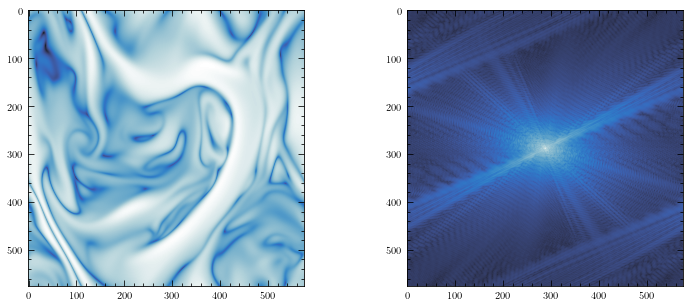

In [12]:
index_time = 0

## initialise side-by-side figure
fig_scales = plt.figure(figsize=(10,4), constrained_layout=True, dpi=75)
fig_grids = GridSpec(ncols=2, nrows=1, figure=fig_scales)
ax0 = fig_scales.add_subplot(fig_grids[0])
ax1 = fig_scales.add_subplot(fig_grids[1])
## take fourier transform
fft_data_shift = np.fft.fftshift(
    np.fft.fft2(flash_fields[index_time])
)
## plot original slice
ax0.imshow(
    np.abs(np.fft.ifft2(np.fft.ifftshift(
        fft_data_shift,
    ))),
    cmap=plt.get_cmap("cmr.arctic"),
    norm=colors.LogNorm()
)
fft_data_shift_abs = np.abs(fft_data_shift)
## plot fft data
ax1.imshow(
    fft_data_shift_abs,
    cmap=plt.get_cmap("cmr.arctic"),
    norm=colors.LogNorm()
)

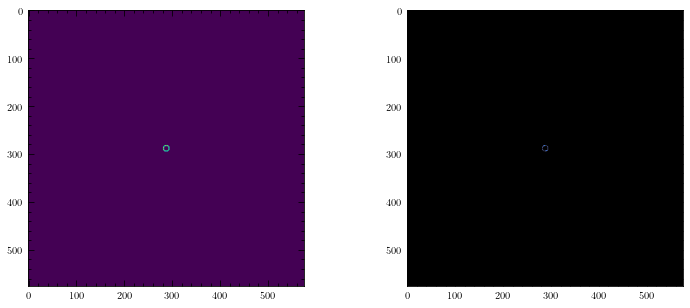

In [13]:
## initialise side-by-side figure
fig_scales = plt.figure(figsize=(10,4), constrained_layout=True, dpi=75)
fig_grids = GridSpec(ncols=2, nrows=1, figure=fig_scales)
ax0 = fig_scales.add_subplot(fig_grids[0])
ax1 = fig_scales.add_subplot(fig_grids[1])
## mask data
Y, X = np.ogrid[:num_grid, :num_grid]
center = (num_grid / 2, num_grid / 2)
dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
mask = (dist_from_center > 5) & (dist_from_center < 7)
## plot mask
ax0.imshow(mask)
## plot masked fft
fft_data_shift_masked = np.where(mask, fft_data_shift, 0)
ax1.imshow(np.abs(fft_data_shift_masked), cmap=plt.get_cmap("cmr.arctic"))

In [14]:
def plotSliceSubAxis(
        ax, data, clim, ax_label_pos, ax_label,
        bool_top_x_axis = False,
        bool_right_y_axis = False,
        bool_plot_big = True
    ):
    ## plot data
    im_obj = ax.imshow(
        data,
        extent = [-1,1,-1,1],
        cmap = plt.get_cmap("cmr.arctic"),
        clim = clim
    )
    ## add figure label
    ax.text(
        ax_label_pos[0], ax_label_pos[1], ax_label,
        color="black", fontsize=16, transform=ax.transAxes, ha="left", va="top",
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round', alpha=0.75)
    )
    ## axis tick label locations
    if bool_plot_big:
        axis_locs = [-1, -0.5, 0, 0.5, 1]
        axis_labels = [r"$\sfrac{-L}{2}$", r"$\sfrac{-L}{4}$", r"$0$", r"$\sfrac{L}{4}$", r"$\sfrac{L}{2}$"]
        alignment_x_axis = ["left", "left", "center", "right", "right"]
        alignment_y_axis = ["bottom", "bottom", "center", "top", "top"]
        empty_axis = ["", "", "", "", ""]
    else:
        axis_locs = [-1, 0, 1]
        axis_labels = [r"$\sfrac{-L}{2}$", r"$0$", r"$\sfrac{L}{2}$"]
        alignment_x_axis = ["left", "center", "right"]
        alignment_y_axis = ["bottom", "center", "top"]
        empty_axis = ["", "", ""]
    ## add axis labels
    ax.set_xticks(axis_locs)
    ax.set_yticks(axis_locs)
    ## check if labels should be plotted on the top axis
    if bool_top_x_axis:
        ax_t = ax.secondary_xaxis('top')
        ax_t.set_xticks(axis_locs)
        ax_t.set_xticklabels(axis_labels)
        for tick, align in zip(ax_t.xaxis.get_major_ticks(), alignment_x_axis):
            tick.label2.set_horizontalalignment(align)
        ax_t.set_xlabel(r"x-axis", fontsize=18, labelpad=10)
    ax.set_xticklabels(empty_axis)
    ## check if labels should be plotted on the top axis
    if bool_right_y_axis:
        ax_r = ax.secondary_yaxis('right')
        ax_r.set_yticks(axis_locs)
        ax_r.set_yticklabels(axis_labels)
        for tick, align in zip(ax_r.yaxis.get_major_ticks(), alignment_y_axis):
            tick.label2.set_verticalalignment(align)
        ax_r.set_ylabel(r"y-axis", rotation=270, fontsize=18, labelpad=20)
        ax.set_yticklabels(empty_axis)
    ## otherwise y-axis label
    else:
        ax.set_yticklabels(axis_labels)
        for tick, align in zip(ax.yaxis.get_major_ticks(), alignment_y_axis):
            tick.label1.set_verticalalignment(align)
        ax.set_ylabel(r"y-axis", fontsize=18, labelpad=10)
    ## return imshow object
    return im_obj

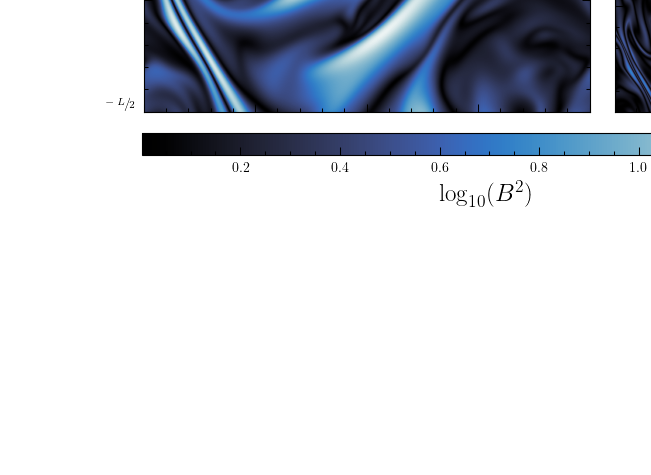

In [15]:
def plotStructures(flash_field, mask_k, save_filepath):
    ## create distance map
    sim_res = np.shape(flash_field)[-1]
    Y, X = np.ogrid[:sim_res, :sim_res]
    center = (sim_res/2, sim_res/2)
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    ## take fourier transform (fft) and apply frequency shift
    fft_data_shift = np.fft.fftshift(
        np.fft.fft2(flash_field)
    )
    ## calculate colorbar limits
    clim = [
        np.min(np.min(flash_field)),
        np.max(np.max(flash_field))
    ]
    ## initialise side-by-side figure
    fig = plt.figure(figsize=(9,9), dpi=100)
    fig_grids = GridSpec(nrows=3, ncols=3, figure=fig)
    ax_0 = fig.add_subplot(fig_grids[:2,:2])
    ax01 = fig.add_subplot(fig_grids[0,2])
    ax11 = fig.add_subplot(fig_grids[1,2])
    ## plot data
    im_obj = plotSliceSubAxis(
        ax_0, flash_field, clim,
        ax_label_pos = [0.05, 0.95],
        ax_label = r"original data",
        bool_top_x_axis = True,
        bool_right_y_axis = False,
        bool_plot_big = True
    )
    plotSliceSubAxis(
        ax = ax01,
        data = np.abs(np.fft.ifft2(np.fft.ifftshift(
            np.where(dist_from_center < mask_k, fft_data_shift, 0)
        ))),
        clim = clim,
        ax_label_pos = [0.1, 0.9],
        ax_label = r"$k < k_\eta$",
        bool_top_x_axis = True,
        bool_right_y_axis = True,
        bool_plot_big = False
    )
    plotSliceSubAxis(
        ax = ax11,
        data = np.abs(np.fft.ifft2(np.fft.ifftshift(
            np.where(dist_from_center > mask_k, fft_data_shift, 0)
        ))),
        clim = clim,
        ax_label_pos = [0.1, 0.9],
        ax_label = r"$k > k_\eta$",
        bool_top_x_axis = False,
        bool_right_y_axis = True,
        bool_plot_big = False
    )
    ## add colorbar
    [[x00,y00], [x01,y01]] = ax_0.get_position().get_points()
    [[x10,y10], [x11,y11]] = ax01.get_position().get_points()
    pad = 0.03; height = 0.025
    cbar = fig.colorbar(
        im_obj,
        cax = fig.add_axes([x00, y00-height-pad, x11-x00, height]),
        orientation="horizontal"
    )
    cbar.set_label(label=r"$\log_{10}(B^2)$", size=18)
    ## save figure
    plt.subplots_adjust(
        wspace = 0.05,
        hspace = 0.1
    )
    plt.savefig(save_filepath)

## plot structures on larger scales than k_eta
plotStructures(
    flash_fields[0],
    mask_k = 6,
    save_filepath = filepath_frames + "B_field.pdf"
)